## Task 1
#### Calculates and prints to the screen the square root of 2 to 100 decimal places. 

I start this task by looking at different squareroot algorithms.</br>

First try to use simple ** operator to raise the number 2  to power 1/2. 

In [7]:
def sqrt2():
    root=2**(1/2)
    return root


In [15]:
print(sqrt2())
r=sqrt2()
result = str(r)[2:]# get the number after decimal point
print("The number of decimal places:",len(result))

1.4142135623730951
the number of decimal places: 16


As it is obvious that by default ** gives result to 16 decimal places

### Newtons Method of Square Root

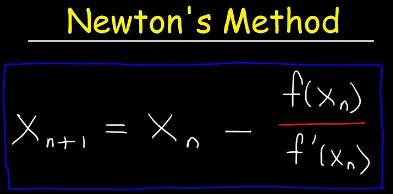

In [28]:
def approxSqrt(num):
    guess=num
    error=0.0000001
    diff=9999999
    while diff >error:
        newGuess= guess - ((guess**2-num)/(2*guess))
        
        diff= newGuess - guess
        if diff<0:
            diff*=-1
        guess=newGuess
        
    print(guess)
    

In [29]:
approxSqrt(2)

1.4142135623730951


Newton Method of Sqareroot:
1. Take a reasonable guess (approximate root) for the square root.

2. Add the approximate root with the original number divided by the approximate root and divide by 2.

 x_i := (x_i + n / x_i) / 2

3. Continue step 2 until the difference in the approximate root along the iterations is less than the desired value (or precision value).
4. The approximate root is the square root we want.

Reference:https://medium.com/@surajregmi/how-to-calculate-the-square-root-of-a-number-newton-raphson-method-f8007714f64#:~:text=Algorithm,root%20and%20divide%20by%202.&text=Continue%20step%202%20until%20the,value%20(or%20precision%20value).

In [13]:
def sqrt(x):
    root = x
    precision = 10 ** (-10)
    print(precision)
    while abs(x - root * root) > precision:
        root = (root + x / root) / 2
        
    return root
    

In [14]:
sqrt(2)

1e-10


1.4142135623746899

## Babylonian method for square root

Algorithm:
This method can be derived from (but predates) Newton–Raphson method.


1 Start with an arbitrary positive start value x (the closer to the 
   root, the better).
2 Initialize difference = 1.
3. Do following until desired approximation is achieved.
  a) Get the next approximation for root using average of x and y
  b) Set y = n/x
Ref: https://www.geeksforgeeks.org/square-root-of-a-perfect-square/

In [31]:
# Returns the square root of n. 
def squareRoot(n): 
  
    # We are using n itself as 
    # initial approximation This 
    # can definitely be improved  
        x = n
        difference = 1
          
        # e decides the accuracy level 
        accuracy = 0.000001
        while(difference > accuracy): 
            x1= 0.5*(x+n/x)
            difference= x-x1
            x=x1
      
        return x 

In [32]:
squareRoot(2)

1.414213562373095

In [4]:
# Function to return the square root of  
# a number using Newtons method  
def squareRoot(n, l) : 
  
    # Assuming the sqrt of n as n only  
    x = n  
  
    # To count the number of iterations  
    count = 0 
  
    while (1) : 
        count += 1 
  
        # Calculate more closed x  
        root = 0.5 * (x + (n / x))  
  
        # Check for closeness  
        if (abs(root - x) < l) : 
            break 
  
        # Update root  
        x = root 
  
    return root  
# source:https://www.geeksforgeeks.org/find-root-of-a-number-using-newtons-method/#:~:text=Let%20N%20be%20any%20number,correct%20square%20root%20of%20N.

In [6]:
squareRoot(2,0.00000001)

1.414213562373095

### Next have a look at available options in python to print 100 decimal Places

In [19]:
#print("{:.100f}".format(r))
printResult = format(r, ',.100f')
  
print(printResult)


1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


In [25]:
# the result is printed to 100 decimal places but there are trailing zeros 
print("Total decimal places",len(str(printResult[2:])))
print(len(str(4142135623730951454746218587388284504413604736328125)))

Total decimal places 100
52


52 decimals are fine with trailing zeros

As finding a squareroot is fine but the number of decimal places is an issue here how to get 100 decimal places as searched on the net it shows that there is a library decimal which can be used to get more decimal places as use of libraries is not allowed for this task but to look at the available option I looked into it 

In [26]:
from decimal import *
getcontext().prec = 100
Decimal(2).sqrt()

Decimal('1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573')

as from the result above it is obvious that it is possible to get result to 100 decimal places but now i move forward that how can i do it without decimal libray

In [3]:
2**0.5

1.4142135623730951

when looking at different algorithms i found the squareroot of 2 and squreroot of 2*102 is same only difference in decimal places so is it possible to get a whole  to 100 digits

In [40]:
print(2**0.5)
print(200**0.5)
print(20000**0.5)
print((2*10**6)**0.5)
print((2*10**8)**0.5)
print((2*10**10)**0.5)


1.4142135623730951
14.142135623730951
141.4213562373095
1414.213562373095
14142.13562373095
141421.35623730952


In [11]:
x = 2 * 10 ** 200

r = x
print(len(str(x)))
# test the difference point, point+1, point-1
def test_diffs(x, r):
    d0 = abs(x - r**2)
    dm = abs(x - (r-1)**2)
    dp = abs(x - (r+1)**2)
    minimised = d0 <= dm and d0 <= dp
    below_min = dp < dm
    print(minimised)
    print(below_min)
    return minimised, below_min

while True:
    oldr = r
    print(oldr)
    print(x//r)
    r = (r + x // r) // 2
    print(r)

    minimised, below_min = test_diffs(x, r)
    if minimised:
        break

    if r == oldr:
        if below_min:
            r += 1
        else:
            r -= 1
        minimised, _ = test_diffs(x, r)
        if minimised:
            break

print(f'{r // 10**100}.{r % 10**100:0100d}')
# source:https://stackoverflow.com/a/64278569

201
200000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
1
100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
False
False
100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
2
50000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
False
False
50000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [2]:
def sqrt(number,digits_after_decimal=100):

    original_number=number # the number 
    number=str(number) # change the number to string
    list=[]
    print(len(number))
    for a in range(len(number)):
        if number[a]=='.':
            decimal_point_locaiton=a
            break
        if a==len(number)-1:
            number+='.'
            decimal_point_locaiton=a+1
            
    if decimal_point_locaiton/2!=round(decimal_point_locaiton/2):
        number='0'+number
        decimal_point_locaiton+=1
    if len(number)/2!=round(len(number)/2):
        number+='0'
    number=number[:decimal_point_locaiton]+number[decimal_point_locaiton+1:]
    decimal_point_ans=int((decimal_point_locaiton-2)/2)+1
    for a in range(0,len(number),2):
        if number[a]!='0':
            list.append(eval(number[a:a+2]))
        else:
            try:
                list.append(eval(number[a+1]))
            except IndexError:
                pass
    p=0
    c=list[0]
    x=0
    ans=''
    for a in range(len(list)):
        while c>=(20*p+x)*(x):
            x+=1
        y=(20*p+x-1)*(x-1)
        p=p*10+x-1
        ans+=str(x-1)
        c-=y
        try:
            c=c*100+list[a+1]
        except IndexError:
            c=c*100
    while c!=0:
        x=0
        while c>=(20*p+x)*(x):
            x+=1
        y=(20*p+x-1)*(x-1)
        p=p*10+x-1
        ans+=str(x-1)
        c-=y
        c=c*100
        if len(ans)-decimal_point_ans>=digits_after_decimal:
                break
    ans=ans[:decimal_point_ans]+'.'+ans[decimal_point_ans:]

    return ans
#Source: https://stackoverflow.com/questions/5187664/generating-digits-of-square-root-of-2
#source:https://stackoverflow.com/a/7003789

as finding a squareroot there are algorithm for it but as the number of decimal places is and issue here how to get 100 decimal places as searched on the net it shows that there is a library decimal which can be used to get more decimal places as use of libraries is not allowed for this task but to look at the available option I looked into it 

In [1]:
from decimal import *
getcontext().prec = 100
Decimal(2).sqrt()

Decimal('1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573')

as from the result above it is obvious that it is possible to get result to 100 decimal places but now i move forward that how can i do it without decimal libray

In [3]:
2**0.5

1.4142135623730951

In [3]:
sqrt(2,)

1


'1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727'

a=1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573
b=1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727

I come accross these two codes that complete the task requirement and now need to research the algorithm behind both of these 

## References:


1.https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Digit-by-digit_calculation 12/10/2020

2.Approximating Square Roots w/ Newton's Method https://www.youtube.com/watch?v=tUFzOLDuvaE 12/10/2020
3.Look at the format to print 100 decimal places 19/10/2020
